In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

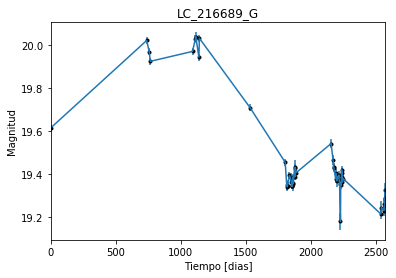

In [2]:
data = np.genfromtxt('LC_216689_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_216689_G')
plt.savefig("LC_216689_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

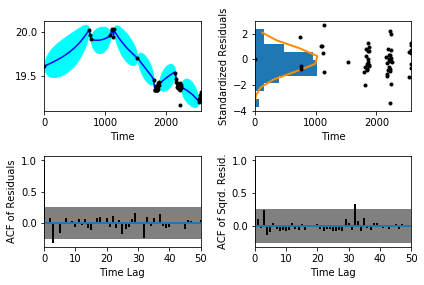

In [5]:
sample.assess_fit()

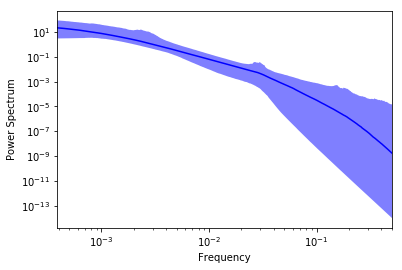

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

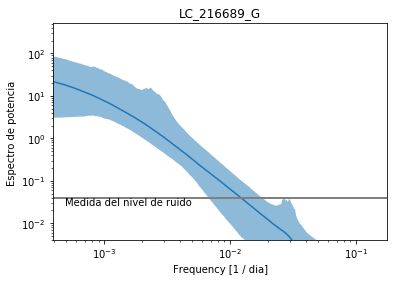

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_216689_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_216689_G')

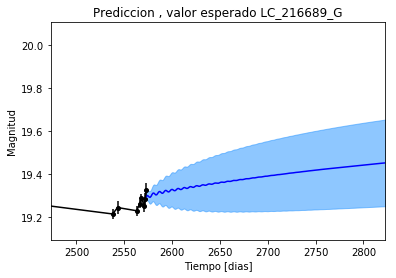

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_216689_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_216689_G')

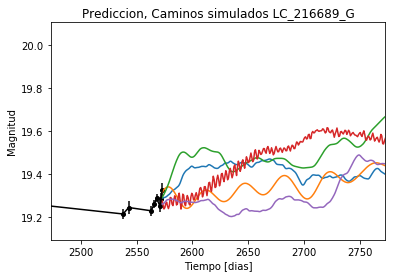

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_216689_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


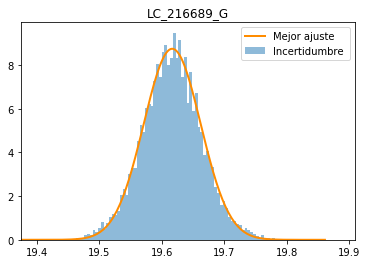

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_216689_G')
plt.savefig("Mejor_ajuste_LC_216689_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_216689_G')

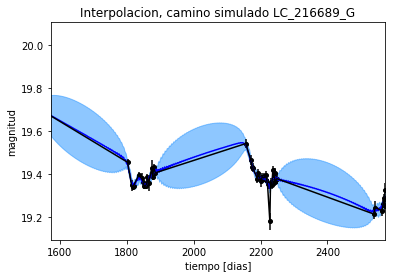

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_216689_G')

Text(0.5,1,'Interpolacion, camino simulado  LC_216689_G')

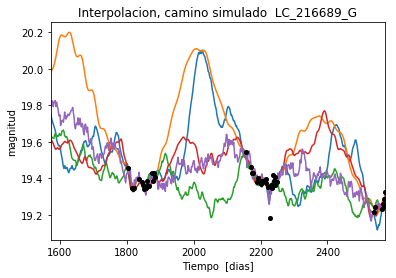

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_216689_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 211.839574287
Median: 0.0199754152524
Standard deviation: 0.222591990543
68% credibility interval: [ 0.00123914  0.26730433]
95% credibility interval: [  4.64673792e-04   8.31602251e-01]
99% credibility interval: [  4.09621936e-04   9.53618151e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 480.615765184
Median: 0.00813886544561
Standard deviation: 0.0914643147127
68% credibility interval: [ 0.00069606  0.0586002 ]
95% credibility interval: [ 0.00042535  0.30004671]
99% credibility interval: [  3.97776865e-04   6.53418439e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 401.21398931
Median: 0.0284999176623
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 682.49802084
Median: 110.19565035
Standard deviation: 2.02800632368
68% credibility interval: [ 107.8389802   111.72742914]
95% credibility interval: [ 104.91000778  112.67748834]
99% credibility interval: [ 102.53717795  113.24793847]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 191.531040475
Median: 0.616649650663
Standard deviation: 2.55314936658
68% credibility interval: [ 0.05247555  4.51794489]
95% credibility interval: [ 0.01676429  8.68982526]
99% credibility interval: [  0.01227267  10.60871325]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 473.304365816
Median: 1.67676802858
Standard deviation: 9.98069863201
68% credibility interval: [  0.04448007  14.14051155]
95% credibility interval: [  2.46590890

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2672.25505008
Median: 4.49116826092e-24
Standard deviation: 107782.878848
68% credibility interval: [  5.62556038e-74   2.86301952e-04]
95% credibility interval: [  6.94694305e-102   1.04964258e+001]
99% credibility interval: [  1.32279503e-114   3.33655346e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1802.63301786
Median: 19.6341993807
Standard deviation: 0.12500573703
68% credibility interval: [ 19.5198002   19.75067732]
95% credibility interval: [ 19.38890857  19.88634233]
99% credibility interval: [ 19.27961975  20.0119587 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 400.74390529
Median: 0.0508491989189
Standard deviation: 0.262437443442
68% credibility interval: [ 0.          0.46264999]
95% credibility interval: [ 0.          0.93737991]
99% credibility interval: [ 0.          0.99114024]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 400.74390529
Median: 0.0508491989189
Standard deviation: 0.262437443442
68% credibility interval: [ 0.          0.46264999]
95% credibility interval: [ 0.          0.93737991]
99% credibility interval: [ 0.          0.99114024]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 435.307793694
Median: 0.0
Standard deviation: 0.000594861091155
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 682.49802084
Median: 110.19565035
Standard deviation: 2.02800632368
68% credibility interval: [ 107.8389802   111.72742914]
95% credibility interval: [ 104.91000778  112.67748834]
99% credibility interval: [ 102.53717795  113.24793847]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1155.89236181
Median: 0.0585976863979
Standard deviation: 0.0586153798986
68% credibility interval: [ 0.03883076  0.10248792]
95% credibility interval: [ 0.02719473  0.20972133]
99% credibility interval: [ 0.02194667  0.35519235]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 756.267770304
Median: 1.27768152117
Standard deviation: 0.235427232935
68% credibility interval: [ 1.06768853  1.52901818]
95% credibility interval: [ 0.88748119  1.82549933]
99% credibility interval: [ 0.8056038   1.95559643]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 393.978451203
Median: 0.00402945589717
Standard deviation: 0.171718831808
68% credibility interval: [  3.21083523e-05   5.39282811e-02]
95% credibility interval: [  9.35106937e-06   3.38237103e-01]
99% credibility interval: [  5.66398806e-06   1.04939042e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 211.839574287
Median: (-0.125509235619-2.52213801469j)
Standard deviation: 2.16218827478
68% credibility interval: [-1.67952262-4.58071728j -0.00778574-4.06391876j]
95% credibility interval: [ -5.22511105e+00+0.j          -2.91963154e-03-0.31608568j]
99% credibility interval: [ -5.99175955e+00+0.j         -2.57373053e-03-0.1918009j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 480.615765184
Median: (-0.051137999785+1.02231993954j)
Standard deviation: 1.74621840892
68% credibility interval: [-0.36819592+0.52785126j -0.00437349+0.18974517j]
95% credibility interval: [-1.88524907+1.51659539j -0.00267254+0.j        ]
99% credibility interval: [ -4.10554913e+00+1.93265435j  -2.49930576e-03+0.j        ]
Posterior summary 